# Exploring various linear regression algorithms on abalone dataset 

## Introduction:
'Abalone is a common name for any of a group of small to very large marine gastropod molluscs in the family Haliotidae. Other common names are ear shells, sea ears, muttonfish. Abalones are marine snails. The shells of abalones have a low, open spiral structure, and are characterized by several open respiratory pores in a row near the shell's outer edge. The thick inner layer of the shell is composed of nacre (mother-of-pearl), which in many species is highly iridescent, giving rise to a range of strong, changeable colors which make the shells attractive to humans as decorative objects, jewelry, and as a source of colorful mother-of-pearl. The flesh of abalones is widely considered to be a desirable food, and is consumed raw or cooked by a variety of cultures.' 

'Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.' (references below)

### Information about the data: 
In this project, my primary focus is on the machine learning aspect. In search of a suitable dataset, I discovered the abalone dataset for estimating its age on Kaggle.
I have chosen this dataset for two main reasons:
- It is not as widely used as datasets such as the Titanic dataset, making it a more unique choice.
- It is already prepared for use, with no missing values and no particulat need for preprocessing, which allows for a quicker transition to the machine learning portion of the project.

### Aims of the project:
My main goal when I started working on this project was to showcase my ability to use machine learning techiques to construct a linear regression model. Moreover, I wanted to gain a deeper understanding of the features of the abalone dataset and their correlation with the age of the abalone. I also wanted to explore the different model selection and optimization techniques to find the best performing model on this dataset.

### Ethics of the data:
The data set was published on kaggle, which means that it is publicly accessible and can be downloaded and used in data science projects by anyone.

In [1]:
# importing essential liblaries for a data science project 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('darkgrid')

I downloaded the data set and saved it on my computer. This is why i am using **pd.read_csv** method in order to get the data. 

In [2]:
abalone_df = pd.read_csv('abalone.csv')

In [3]:
abalone_df

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


Let's check some main information about the dataset:

In [4]:
abalone_df.shape

(4177, 10)

In [5]:
abalone_df.dtypes

sex            object
length        float64
diameter      float64
height        float64
whole_wt      float64
shucked_wt    float64
viscera_wt    float64
shell_wt      float64
rings           int64
age           float64
dtype: object

In [6]:
abalone_df.isnull().any()

sex           False
length        False
diameter      False
height        False
whole_wt      False
shucked_wt    False
viscera_wt    False
shell_wt      False
rings         False
age           False
dtype: bool

As mentioned above, I deliberatly chose this data set because as it does not require handling of missing values. It can be seen that the **rings** column has an **int64** data type, which is acceptable, however, for consistency, I will convert it to a **float** data type to ensure that all columns containing numeric values have the same data type.

In [7]:
abalone_df['rings'] = abalone_df['rings'].astype(float)

In [8]:
abalone_df.dtypes

sex            object
length        float64
diameter      float64
height        float64
whole_wt      float64
shucked_wt    float64
viscera_wt    float64
shell_wt      float64
rings         float64
age           float64
dtype: object

### Explatory data analysis:
I performed some vizalizations in order to get more insigths of the data. 

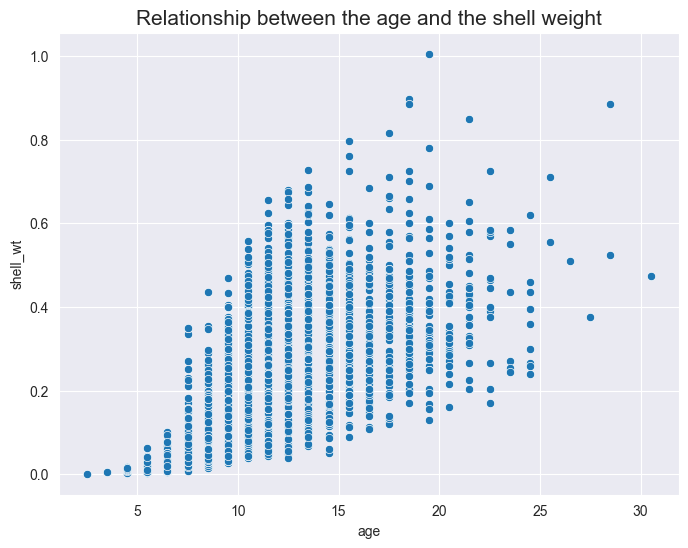

In [9]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x='age', y='shell_wt',data=abalone_df)
ax.set_title('Relationship between the age and the shell weight',fontsize=15)
plt.show()

There is no correlation between the age and the weight of the shell. There are many abalones which have the same shell weight and their age spreads from 10 to 25 years. 

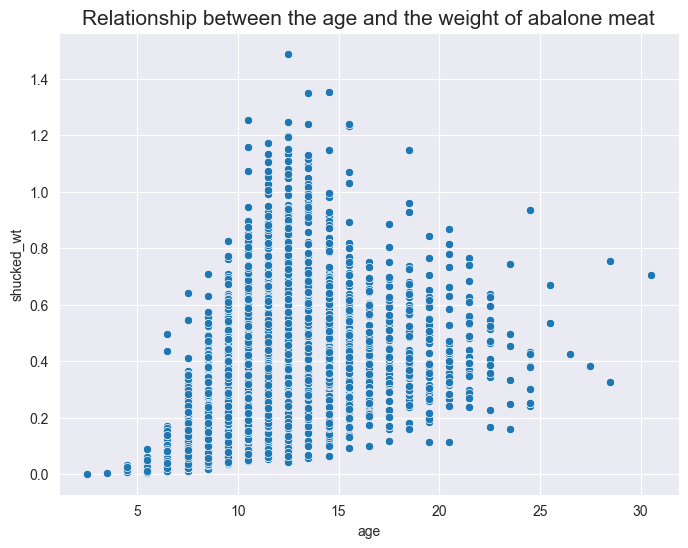

In [10]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x='age', y='shucked_wt',data=abalone_df)
ax.set_title('Relationship between the age and the weight of abalone meat',fontsize=15)
plt.show()

In example above, there is no relationship between the age and the meat of the abalone. 

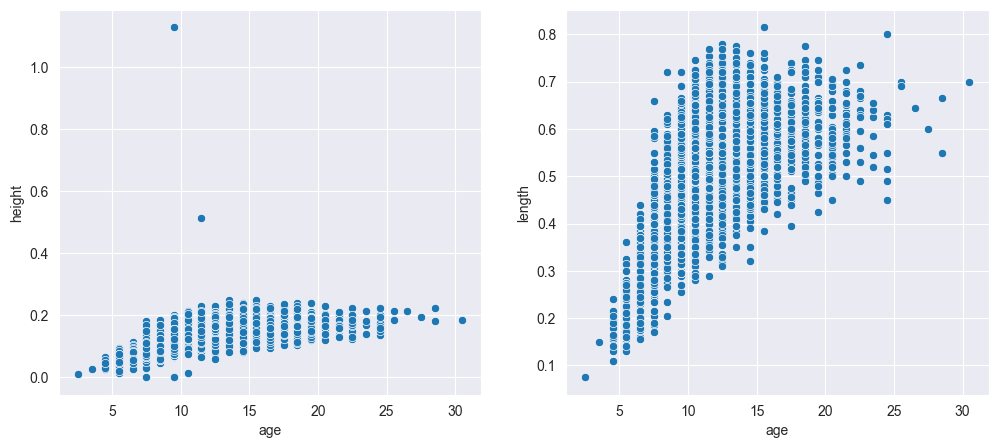

In [11]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(data = abalone_df, x = 'age', y = 'height', ax=ax[0])

sns.scatterplot(data = abalone_df, x = 'age', y = 'length', ax=ax[1])

plt.show()

In this two plots we can see that there is no significant correlation between height an abalone and its age. On the second plot it can be seen that there is some slight correlation between the length and the age. However, this correlation is not strong, as there are also some individuals of the same age with different lengths.

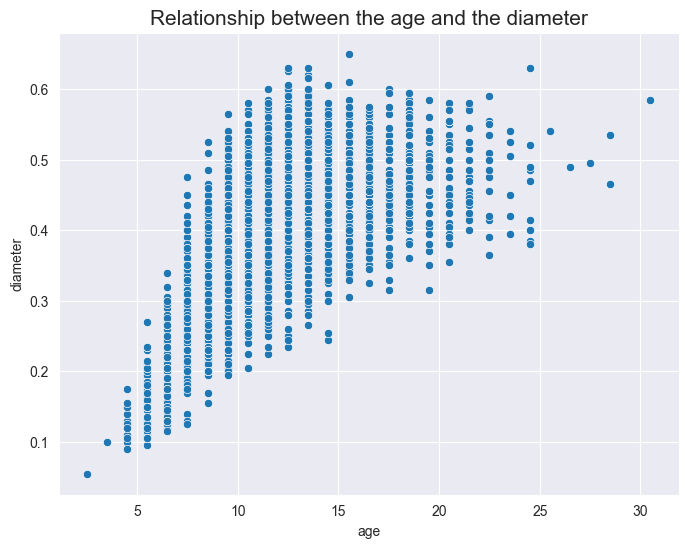

In [12]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x='age', y='diameter',data=abalone_df)
ax.set_title('Relationship between the age and the diameter',fontsize=15)
plt.show()

There is some slight correlation between the age and the diameter. However, it is not too strong. 

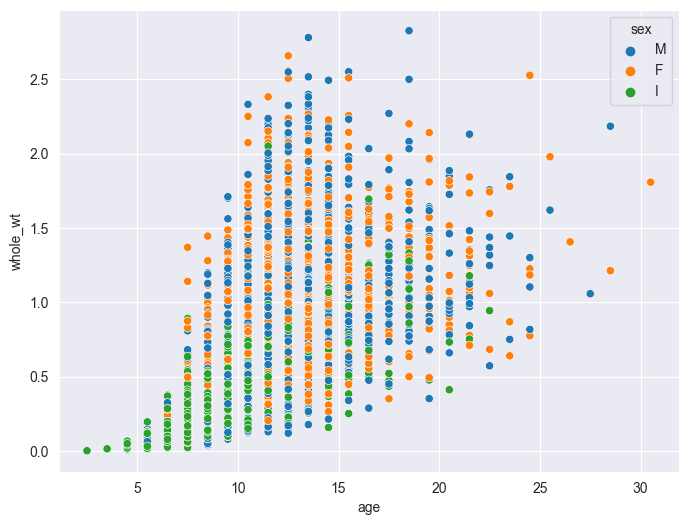

In [13]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x='age',y='whole_wt',hue='sex',data=abalone_df)
plt.show()

Here it can be noticed that most of the leight and young abalones are in the infant stage, but there are some exceptions as well.  

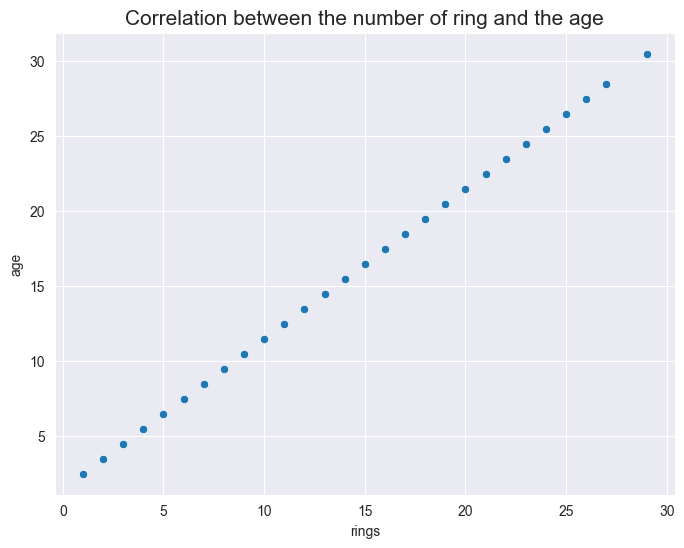

In [14]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x='rings',y='age',data=abalone_df)
ax.set_title('Correlation between the number of ring and the age',fontsize=15)
plt.show()

The age of an abalone is perectly corellated with the number of the rings. It is not surprising as the age of the abalone is being estimated by counting the number of the rings and adding 1.5.

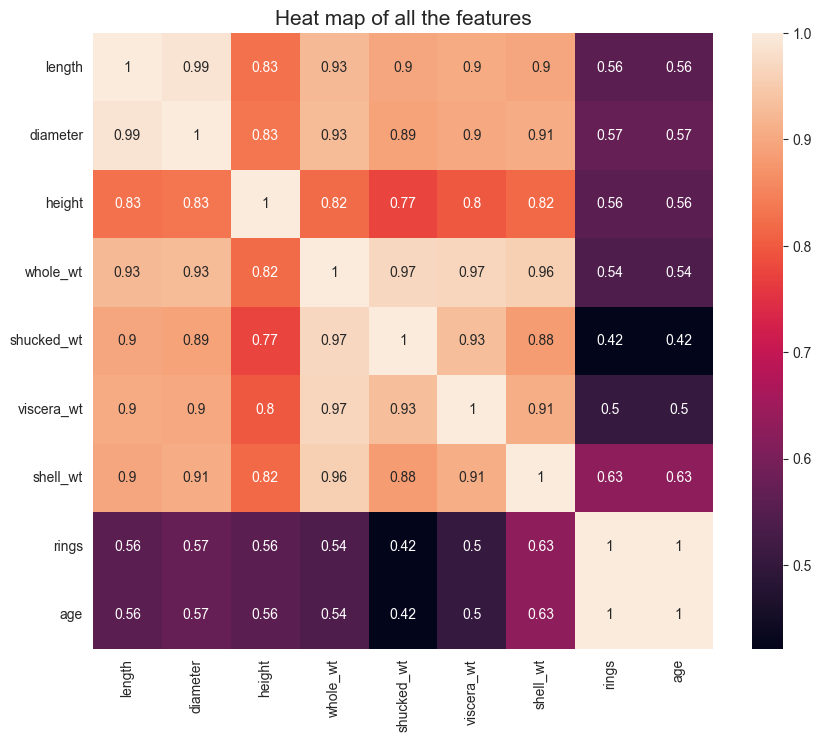

In [15]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(abalone_df.corr(numeric_only=True),annot=True)
ax.set_title('Heat map of all the features',fontsize=15)
plt.show()

By looking at this heat map we can easily see which features correlate with each other. Some of the relationships were examined in the step before, however, this heatmap allows to have a more comprehensive view of all the features and their correlations. 

### Feature Engineering:
In this small step, I will convert the sex column to a numeric one by using **pd.get_dummies.** Then I can use this updated dataset in a machine learning model. 

In [16]:
sex_dummies = pd.get_dummies(abalone_df['sex'],drop_first=True)
abalone_df = pd.concat([abalone_df,sex_dummies],axis=1)
abalone_df

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,I,M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0,16.5,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0,8.5,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0,10.5,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0,11.5,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0,8.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0,12.5,0,0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0,11.5,0,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0,10.5,0,1
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0,11.5,0,0


Let's remove the sex column as well as rings column since it is 100% correlated with the age column, which I want to predict. This can bias the model.

In [17]:
abalone_df.drop(['sex','rings'],axis=1,inplace=True)
abalone_df

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,age,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5,0,0


In [18]:
abalone_df.dtypes

length        float64
diameter      float64
height        float64
whole_wt      float64
shucked_wt    float64
viscera_wt    float64
shell_wt      float64
age           float64
I               uint8
M               uint8
dtype: object

I will also change the type of I an M columns to float since they had uint8 data type. 

In [19]:
abalone_df[['I','M']] = abalone_df[['I','M']].astype(float)
abalone_df.dtypes

length        float64
diameter      float64
height        float64
whole_wt      float64
shucked_wt    float64
viscera_wt    float64
shell_wt      float64
age           float64
I             float64
M             float64
dtype: object

### Machine learning: sci-kit learn - linear regression

Let's split the data into two parts: y is the feature we want to predict (age), X - all of the other features

In [20]:
X = abalone_df.drop('age',axis=1)

In [21]:
y = abalone_df['age']

In [22]:
# importing needed stuff for machine learning 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
# splitting the data into the train set and the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating the linear regression model 
lm = LinearRegression()

# fitting the model
lm.fit(X_train,y_train)

# predicting the model 
predictions = lm.predict(X_test)

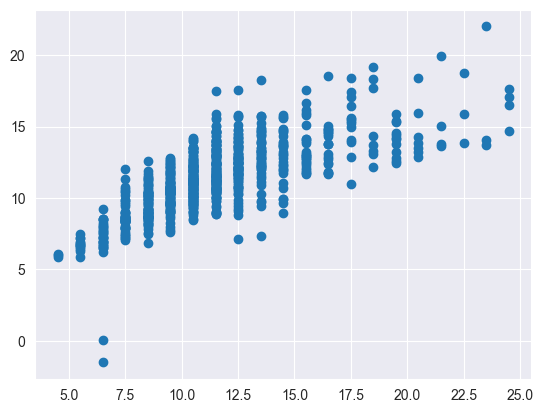

In [24]:
# plotting the results
plt.scatter(y_test,predictions)

It looks like the model does not work pretty well. Let's also have a look at some metrics which can say a bit more about the performance of the model. 

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 SCORE:', metrics.r2_score(y_test,predictions))

MAE: 1.5931067816608357
MSE: 4.891232447128578
RMSE: 2.2116130871218362
R2 SCORE: 0.5481628137889264


Looking at the metrics it can be infered that the performance of the model is not great. The R2 score is not even close to 1, which indictes bad performance. However, I will try different approaches.

### Sci-kit learn - polynomial linear regression 

In [26]:
# importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

# transforming the feature matrix to a higher degree polynomial matrix
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# fitting the model
reg = LinearRegression()
reg.fit(X_train_poly, y_train)

# predicting the model
y_pred_poly = reg.predict(X_test_poly)


# printing the results
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_poly))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_poly))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print('R2 SCORE:', metrics.r2_score(y_test,y_pred_poly))

MAE: 1.5384645096330256
MSE: 4.829968938736264
RMSE: 2.197719030890042
R2 SCORE: 0.5538221504793452


It looks like the performance of the polynomial regression model is almost the same as the linear regression one. There is a slight upgrade in R2 score, however, it is not spectacular. 

### Sci-kit learn - gradient boosting regressior 

In [27]:
# importing gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

# fitting the gradient boosting regressor model
gbr = GradientBoostingRegressor(n_estimators=400, learning_rate=0.1,max_depth=2, random_state=42)
gbr.fit(X_train, y_train)

# predicting the model
y_pred_gbr = gbr.predict(X_test)

# getting the results
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gbr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gbr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))
print('R2 SCORE:', metrics.r2_score(y_test,y_pred_gbr))

MAE: 1.5626798190609426
MSE: 4.932399462510292
RMSE: 2.2209005971700515
R2 SCORE: 0.5443599300380835


This model performed slightly worse than previous two. 

### Sci-kit learn - linear regression combined with gradien boosting 

In [28]:
# creating new linear regression model 
lin_reg = LinearRegression().fit(X_train, y_train)

# using the residuals from the linear regression model as the input for gbr
y_train_residuals = y_train - lin_reg.predict(X_train)

# fitting gbr
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.4,max_depth=1, random_state=42)
gbr.fit(X_train, y_train_residuals)

# predicing the model
y_pred_lin = lin_reg.predict(X_test)
y_pred_gbr = gbr.predict(X_test)
y_pred = y_pred_lin + y_pred_gbr

# printing the results
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 SCORE:', metrics.r2_score(y_test,y_pred))

MAE: 1.5713940708010132
MSE: 4.79565190601302
RMSE: 2.189897693047102
R2 SCORE: 0.5569922536532164


This model has still bad performance, however, it is the best so far. 

Now I would like to move to the deep learning part.

### Machine learning: deep learning with tensorflow

In [29]:
# importing tensorflow
import tensorflow as tf 

In [30]:
X = X.values

In [31]:
y = y.values

In [32]:
# importing scaler 
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
scaler = MinMaxScaler()

# fitting and transforming the train set
X_train = scaler.fit_transform(X_train)

# transforming the test set
X_test = scaler.transform(X_test)

In [33]:
# importing syntax for deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras import optimizers

Let's quickly check the shape of the train set

In [34]:
X_train.shape

(3341, 9)

### Creating the models:
In this section, I will construct different 5 models with unique featuers, such as the number of hidden layers, the number of neurons, different optimazers, and activation functions. Then, I will evaluate their performances and compare them to see which one had the most optimal performance. 

In [35]:
'''
creating first model with 4 hidden layers, 
9 neurons in each layer, ReLU as activation function,
adam as optimizer and mean squered error as loss function

'''
model_1 = Sequential()


model_1.add(Dense(9,activation='relu'))
model_1.add(Dropout(0.2))

model_1.add(Dense(9,activation='relu'))
model_1.add(Dropout(0.2))

model_1.add(Dense(9,activation='relu'))
model_1.add(Dropout(0.2))

model_1.add(Dense(9,activation='relu'))
model_1.add(Dropout(0.2))

model_1.add(Dense(9,activation='relu'))
model_1.add(Dropout(0.2))

# add output layer 
model_1.add(Dense(units=1,activation='relu'))

# compile the model with adam opitmizer and mean squered error as loss function
model_1.compile(optimizer='adam',loss='mse')

Metal device set to: Apple M2


2023-01-27 21:28:45.690763: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-27 21:28:45.691620: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [36]:
# import early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [37]:
# fitting the model
model_1.fit(x=X_train,
            y=y_train,
            validation_data=(X_test, y_test),
            epochs=250,
            batch_size=128,
            callbacks=[early_stop])

Epoch 1/250


2023-01-27 21:28:48.475197: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-27 21:28:48.741413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 1s 13ms/step - loss: 137.9048 - val_loss: 135.3006
Epoch 2/250
20/27 [=====================>........] - ETA: 0s - loss: 131.1914

2023-01-27 21:28:49.234735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 0s 7ms/step - loss: 128.7829 - val_loss: 124.7761
Epoch 3/250
27/27 [==============================] - 0s 7ms/step - loss: 106.8374 - val_loss: 94.6074
Epoch 4/250
27/27 [==============================] - 0s 7ms/step - loss: 65.4353 - val_loss: 40.3028
Epoch 5/250
27/27 [==============================] - 0s 7ms/step - loss: 46.5516 - val_loss: 36.8540
Epoch 6/250
27/27 [==============================] - 0s 6ms/step - loss: 40.1678 - val_loss: 36.2338
Epoch 7/250
27/27 [==============================] - 0s 7ms/step - loss: 36.2034 - val_loss: 36.9831
Epoch 8/250
27/27 [==============================] - 0s 6ms/step - loss: 32.6348 - val_loss: 37.4974
Epoch 9/250
27/27 [==============================] - 0s 6ms/step - loss: 29.0641 - val_loss: 37.0711
Epoch 10/250
27/27 [==============================] - 0s 7ms/step - loss: 26.7421 - val_loss: 37.1892
Epoch 11/250
27/27 [==============================] - 0s 7ms/step - loss: 23.8596 - val_loss: 40.16

In [38]:
losses1 = pd.DataFrame(model_1.history.history)

<AxesSubplot: >

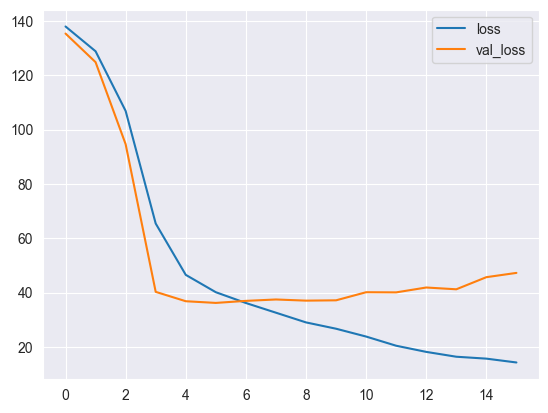

In [39]:
# plotting the loss and vall loss of the first model
losses1[['loss','val_loss']].plot()

Examining this plot allows to exaluate the model's performance. If the lines like above, it can be inferred that the model is not functioning effectively. This is a valuable indicator, but it is also important to note that metrics such as Root Mean Squared Error (RMSE) and Mean Squared Error (MSE) can also be employed to evaluate the model's performance. A comprehensive analysis of all metrics will be conducted at the conclusion of the project.

In [40]:
# getting predictions
predictions_1 = model_1.predict(X_test)

27/27 [==============================] - 0s 2ms/step


2023-01-27 21:29:17.701719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [41]:
'''
creating second model with just one hidden layer, 
128 and 64 neurons in each layer respectively, 
ReLu as activation function, adam as optimizer 
and MSE as loss function 
''' 
model_2= Sequential()

model_2.add(Dense(128,activation='relu'))
model_2.add(Dropout(0.2))

model_2.add(Dense(64,activation='relu'))
model_2.add(Dropout(0.2))

model_2.add(Dense(units=1,activation='relu'))

model_2.compile(optimizer='adam',loss='mse')

# fitting the model 
model_2.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          epochs=250,
          batch_size=128,
          callbacks=[early_stop])

Epoch 1/250
 9/27 [=========>....................] - ETA: 0s - loss: 137.0602

2023-01-27 21:29:18.161033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 0s 10ms/step - loss: 125.1669 - val_loss: 98.7411
Epoch 2/250
27/27 [==============================] - 0s 5ms/step - loss: 63.4756 - val_loss: 20.3392
Epoch 3/250
 1/27 [>.............................] - ETA: 0s - loss: 22.6631

2023-01-27 21:29:18.467503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 0s 5ms/step - loss: 12.9732 - val_loss: 9.1601
Epoch 4/250
27/27 [==============================] - 0s 5ms/step - loss: 10.4938 - val_loss: 8.5530
Epoch 5/250
27/27 [==============================] - 0s 5ms/step - loss: 10.0405 - val_loss: 8.2553
Epoch 6/250
27/27 [==============================] - 0s 5ms/step - loss: 9.7151 - val_loss: 7.8985
Epoch 7/250
27/27 [==============================] - 0s 5ms/step - loss: 9.3837 - val_loss: 7.6744
Epoch 8/250
27/27 [==============================] - 0s 5ms/step - loss: 9.1373 - val_loss: 7.4264
Epoch 9/250
27/27 [==============================] - 0s 5ms/step - loss: 8.5317 - val_loss: 7.1047
Epoch 10/250
27/27 [==============================] - 0s 5ms/step - loss: 8.0920 - val_loss: 6.8952
Epoch 11/250
27/27 [==============================] - 0s 5ms/step - loss: 7.9292 - val_loss: 6.6824
Epoch 12/250
27/27 [==============================] - 0s 5ms/step - loss: 7.9373 - val_loss: 6.5518
Epoch 13/250
27/

<AxesSubplot: >

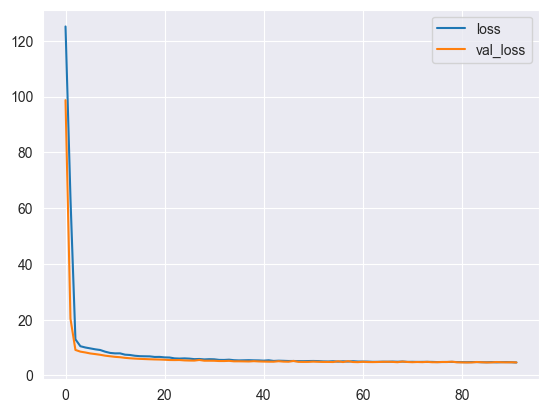

In [42]:
# plotting the loss and vall loss of the second model
losses2 = pd.DataFrame(model_2.history.history)
losses2[['loss','val_loss']].plot()

In this case it can be noticed that the curves overlap one another. This can mean that the model performs well, but the final result of the performance can be defined while looking at the values of the matrics. 

In [43]:
# getting predictions
predictions_2 = model_2.predict(X_test)

27/27 [==============================] - 0s 2ms/step


2023-01-27 21:29:57.384646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [44]:
'''
creating third model with 2 hidden layers, 
64,32 and 16 neurons respectively, activation funcion - ReLu,
optimizer - adam, loss - MSE
''' 

model_3 = Sequential()

model_3.add(Dense(64,activation='relu'))
model_3.add(Dropout(0.2))

model_3.add(Dense(32,activation='relu'))
model_3.add(Dropout(0.2))

model_3.add(Dense(16,activation='relu'))
model_3.add(Dropout(0.2))

model_3.add(Dense(units=1,activation='relu'))

model_3.compile(optimizer='adam',loss='mse')

# fitting the model
model_3.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          epochs=250,
          batch_size=128,
          callbacks=[early_stop])

Epoch 1/250
 8/27 [=======>......................] - ETA: 0s - loss: 136.5866

2023-01-27 21:29:58.447560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 1s 12ms/step - loss: 125.7672 - val_loss: 104.5224
Epoch 2/250
23/27 [========================>.....] - ETA: 0s - loss: 77.7436

2023-01-27 21:29:58.807461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 0s 6ms/step - loss: 73.7060 - val_loss: 30.9942
Epoch 3/250
27/27 [==============================] - 0s 6ms/step - loss: 19.7710 - val_loss: 9.1938
Epoch 4/250
27/27 [==============================] - 0s 5ms/step - loss: 16.2109 - val_loss: 9.4642
Epoch 5/250
27/27 [==============================] - 0s 5ms/step - loss: 15.6932 - val_loss: 9.4708
Epoch 6/250
27/27 [==============================] - 0s 6ms/step - loss: 14.3104 - val_loss: 8.4381
Epoch 7/250
27/27 [==============================] - 0s 5ms/step - loss: 13.4814 - val_loss: 8.2914
Epoch 8/250
27/27 [==============================] - 0s 6ms/step - loss: 12.5522 - val_loss: 7.8307
Epoch 9/250
27/27 [==============================] - 0s 5ms/step - loss: 11.7783 - val_loss: 7.8550
Epoch 10/250
27/27 [==============================] - 0s 6ms/step - loss: 11.2521 - val_loss: 7.6224
Epoch 11/250
27/27 [==============================] - 0s 6ms/step - loss: 10.5230 - val_loss: 7.4895
Epoch 12/

<AxesSubplot: >

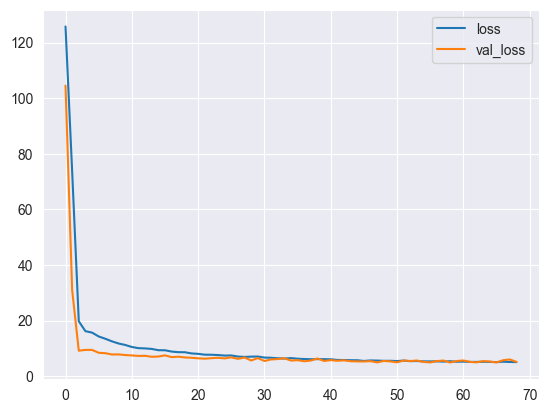

In [45]:
# plotting the loss and val loss of the third model 
losses3 = pd.DataFrame(model_3.history.history)
losses3[['loss','val_loss']].plot()

In the plot above, the loss and val loss curves start to overlap one another around 30th epoch. 

In [46]:
# getting predictions for third model 
predictions_3 = model_3.predict(X_test)

27/27 [==============================] - 0s 2ms/step


2023-01-27 21:30:09.340620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [47]:
'''
creating fourth model with 2 hidden layers, 
128 and 64 neurons in each layer but with 
sgd as optimizer, MSE as loss function as well 
'''
model_4 = Sequential()

model_4.add(Dense(128,activation='relu'))
model_4.add(Dropout(0.2))

model_4.add(Dense(64,activation='relu'))
model_4.add(Dropout(0.2))

model_4.add(Dense(units=1,activation='relu'))

model_4.compile(optimizer='sgd',loss='mse')
# fitting the model 
model_4.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          epochs=250,
          batch_size=128,
          callbacks=[early_stop])

Epoch 1/250
11/27 [===========>..................] - ETA: 0s - loss: 53.3475 

2023-01-27 21:30:09.559835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 0s 9ms/step - loss: 28.9670 - val_loss: 7.2246
Epoch 2/250
27/27 [==============================] - 0s 5ms/step - loss: 9.3016 - val_loss: 8.5629
Epoch 3/250
 1/27 [>.............................] - ETA: 0s - loss: 12.6022

2023-01-27 21:30:09.843372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 0s 5ms/step - loss: 8.7852 - val_loss: 7.8693
Epoch 4/250
27/27 [==============================] - 0s 4ms/step - loss: 8.2720 - val_loss: 6.6769
Epoch 5/250
27/27 [==============================] - 0s 4ms/step - loss: 7.9152 - val_loss: 7.7210
Epoch 6/250
27/27 [==============================] - 0s 4ms/step - loss: 7.8183 - val_loss: 7.5512
Epoch 7/250
27/27 [==============================] - 0s 4ms/step - loss: 7.6509 - val_loss: 9.2236
Epoch 8/250
27/27 [==============================] - 0s 5ms/step - loss: 7.5812 - val_loss: 7.0549
Epoch 9/250
27/27 [==============================] - 0s 5ms/step - loss: 7.7810 - val_loss: 6.4550
Epoch 10/250
27/27 [==============================] - 0s 4ms/step - loss: 7.2445 - val_loss: 10.0814
Epoch 11/250
27/27 [==============================] - 0s 5ms/step - loss: 7.3855 - val_loss: 6.3997
Epoch 12/250
27/27 [==============================] - 0s 4ms/step - loss: 7.0019 - val_loss: 6.6746
Epoch 13/250
27/27

<AxesSubplot: >

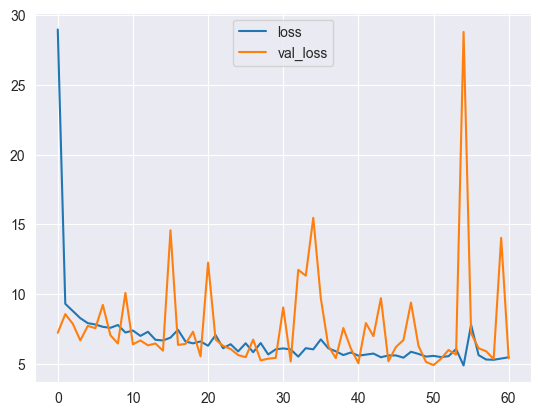

In [48]:
# plotting the loss and vall_loss of the fourth model
losses4 = pd.DataFrame(model_4.history.history)
losses4[['loss','val_loss']].plot()

Here it can be observed that the curve does not have a linear trajectory, mainly because of the presence of 'peaks', or rather mountains. Based on this observation, it can be inferred that the selection of Stochastic Gradient Descent as the optimizer for this model may not be the optimal choice.

In [49]:
# getting predictions for fourth model
predictions_4 = model_4.predict(X_test)

27/27 [==============================] - 0s 2ms/step


2023-01-27 21:30:17.424305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [ ]:
'''
creating last model with 1 hidden layer,
27 and 13 neurons in each layer, 
tanh as activation function, adam as optimizer 
and MSE as loss function
'''

model_5 = Sequential()

model_5.add(Dense(27,activation='tanh'))
model_5.add(Dropout(0.2))

model_5.add(Dense(13,activation='tanh'))
model_5.add(Dropout(0.2))

model_5.add(Dense(units=1,activation='relu'))

model_5.compile(optimizer='adam',loss='mse')

# fitting the model
model_5.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          epochs=250,
          batch_size=128,
          callbacks=[early_stop])

Epoch 1/250
10/27 [==========>...................] - ETA: 0s - loss: 125.0538

2023-01-27 21:30:17.639548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 0s 10ms/step - loss: 117.4909 - val_loss: 101.2245
Epoch 2/250
27/27 [==============================] - 0s 5ms/step - loss: 91.1823 - val_loss: 76.0647
Epoch 3/250
 1/27 [>.............................] - ETA: 0s - loss: 83.3768

2023-01-27 21:30:17.956204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 0s 6ms/step - loss: 69.8017 - val_loss: 58.4446
Epoch 4/250
27/27 [==============================] - 0s 6ms/step - loss: 55.7293 - val_loss: 47.5408
Epoch 5/250
27/27 [==============================] - 0s 5ms/step - loss: 46.9824 - val_loss: 40.4547
Epoch 6/250
27/27 [==============================] - 0s 5ms/step - loss: 40.6015 - val_loss: 35.2917
Epoch 7/250
27/27 [==============================] - 0s 5ms/step - loss: 36.0560 - val_loss: 31.2515
Epoch 8/250
27/27 [==============================] - 0s 5ms/step - loss: 32.3662 - val_loss: 27.9752
Epoch 9/250
27/27 [==============================] - 0s 5ms/step - loss: 29.1572 - val_loss: 25.2441
Epoch 10/250
27/27 [==============================] - 0s 5ms/step - loss: 26.5465 - val_loss: 22.8971
Epoch 11/250
27/27 [==============================] - 0s 6ms/step - loss: 24.2932 - val_loss: 20.8979
Epoch 12/250
27/27 [==============================] - 0s 5ms/step - loss: 22.3455 - val_loss: 19.1888

In [ ]:
# plotting loss and vall los for the fifth model
losses5 = pd.DataFrame(model_5.history.history)
losses5[['loss','val_loss']].plot()

In the example above, the curves almost overlap one another. 

In [ ]:
# getting predictions for fifth model 
predictions_5 = model_5.predict(X_test)

Now let's compare the results of each model. I will create a simple dataset with the indicators of the performances of each model, like mean absolute error, mean squered error and root mean squered error. By looking at this data set we can see which model had the best performance: the smaller the root mean squer error is or the higher R2 score is, the better work the model did. 

In [ ]:
results = {'Prediction 1': [metrics.mean_absolute_error(y_test, predictions_1), metrics.mean_squared_error(y_test, predictions_1), np.sqrt(metrics.mean_squared_error(y_test, predictions_1)), metrics.r2_score(y_test,predictions_1)],
           'Prediction 2': [metrics.mean_absolute_error(y_test, predictions_2), metrics.mean_squared_error(y_test, predictions_2), np.sqrt(metrics.mean_squared_error(y_test, predictions_2)), metrics.r2_score(y_test,predictions_2)],
           'Prediction 3': [metrics.mean_absolute_error(y_test, predictions_3), metrics.mean_squared_error(y_test, predictions_3), np.sqrt(metrics.mean_squared_error(y_test, predictions_3)), metrics.r2_score(y_test,predictions_3)],
           'Prediction 4': [metrics.mean_absolute_error(y_test, predictions_4), metrics.mean_squared_error(y_test, predictions_4), np.sqrt(metrics.mean_squared_error(y_test, predictions_4)), metrics.r2_score(y_test,predictions_4)],
           'Prediction 5': [metrics.mean_absolute_error(y_test, predictions_5), metrics.mean_squared_error(y_test, predictions_5), np.sqrt(metrics.mean_squared_error(y_test, predictions_5)), metrics.r2_score(y_test,predictions_5)]}
df = pd.DataFrame(results, index=['MAE', 'MSE', 'RMSE', 'R2 Score'])

# printing the data frame
print(df)

### Conclusion:
- the characteristics of an abalone do not exhibit a high degree of correlation with its age. 
- there are a variety of techniques that can be employed to predict the age of an abalone. The sci-kit learn method proved to be a straightforward and easy to apply, however without great outcome.
- the implementation of TensorFlow, while more complex, allowed for the examination and experimentation with various parameters that can be incorporated into the deep learning process. 
- the first deep learning model with 4 hidden layers and 9 neurons in each layer has the worst performance. 
- the second deep learning model with 128 neurons in the first layer was determined to be the most effective, as it had the lowest Root Mean Squared Error among all models tested. However, it is not the best possible result. 

### Ideas for another project:
- predict different feature than age, f. e. length, weight of an abalone.
- use different parameters for deep learning models: other activation functions and  optimizers which have not been used in this project. 
- try smaller or higher number of neurons in each layer
- try even more hidden layers, maybe it will catch the correlation of the features better 
- use cross validation for splitting the data 
- use classification algorithm for age prediction 

### References:
    1. About the abalone: https://en.wikipedia.org/wiki/Abalone
    2. Dataset: https://www.kaggle.com/datasets/devzohaib/estimating-the-age-of-abalone-at-a-seafood-farm